<Axes: >

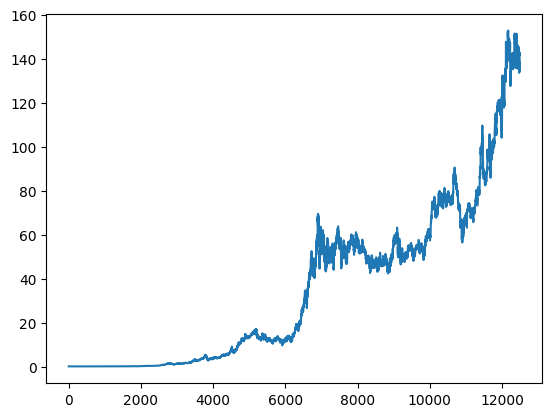

In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/huy164/datasets/master/walmart_stock_price.csv', index_col='Date')
df1 = df.reset_index()['Close']
df1.plot()

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size + test_size]
val_data = df1[train_size + test_size:]

In [6]:

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [8]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
136/136 [==============================] - 41s 254ms/step - loss: 9.3581e-04 - val_loss: 0.0040
Epoch 2/100
136/136 [==============================] - 27s 196ms/step - loss: 6.8326e-05 - val_loss: 0.0063
Epoch 3/100
136/136 [==============================] - 26s 189ms/step - loss: 6.3116e-05 - val_loss: 0.0034
Epoch 4/100
136/136 [==============================] - 26s 191ms/step - loss: 6.4314e-05 - val_loss: 0.0044
Epoch 5/100
136/136 [==============================] - 27s 195ms/step - loss: 5.8981e-05 - val_loss: 0.0036
Epoch 6/100
136/136 [==============================] - 26s 190ms/step - loss: 5.4570e-05 - val_loss: 0.0043
Epoch 7/100
136/136 [==============================] - 26s 190ms/step - loss: 5.8671e-05 - val_loss: 0.0052
Epoch 8/100
136/136 [==============================] - 26s 190ms/step - loss: 5.2256e-05 - val_loss: 0.0041
Epoch 9/100
136/136 [==============================] - 26s 191ms/step - loss: 5.8027e-05 - val_loss: 0.0041
Epoch 10/100
136/136 [======

In [11]:
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

36/36 [==============================] - 1s 37ms/step


In [12]:
y_pred = scaler.inverse_transform(y_pred)
y_pred_val = scaler.inverse_transform(y_pred_val)

In [13]:
from sklearn.metrics import mean_squared_error

valid_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(val_data[101:]), y_pred_val))
test_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(test_data[101:]), y_pred))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 9.812056517276913
Testing RMSE: 2.755555070535934


In [42]:
y_train = scaler.inverse_transform((y_train).reshape(-1, 1))

y_test = scaler.inverse_transform((y_test).reshape(-1, 1))


<function matplotlib.pyplot.show(close=None, block=None)>

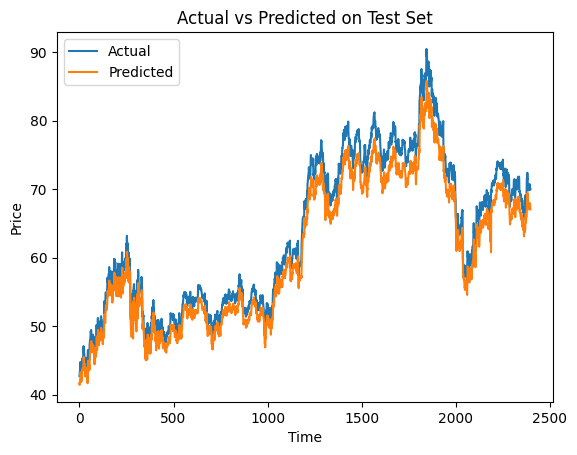

In [45]:

# Plot predictions
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted on Test Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show

In [24]:
x_input = val_data[-100:].reshape(1, -1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1
future_predictions = scaler.inverse_transform(lst_output)



In [25]:
import matplotlib.pyplot as plt

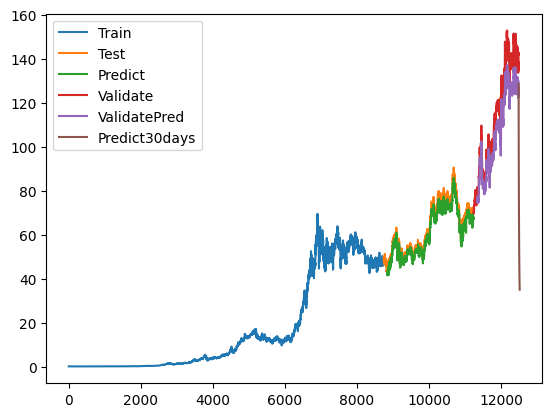

In [26]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()